In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
!pip install kaggle

In [10]:
file_path = '/content/fake reviews dataset.csv'
data = pd.read_csv(file_path)
print("Dataset Loaded")
data.head()


Dataset Loaded


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [11]:
print("Data Information:")
data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  15155 non-null  object 
 1   rating    15155 non-null  float64
 2   label     15155 non-null  object 
 3   text_     15155 non-null  object 
dtypes: float64(1), object(3)
memory usage: 473.7+ KB


In [12]:

print("Class Distribution:")
print(data['label'].value_counts())

Class Distribution:
label
CG    7578
OR    7577
Name: count, dtype: int64


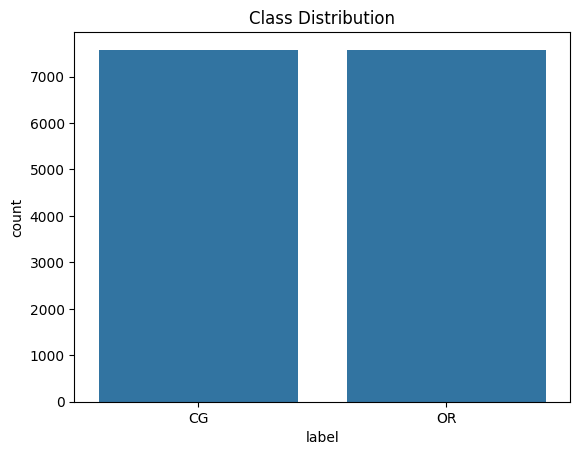

In [13]:
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.show()

In [14]:
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
category    0
rating      0
label       0
text_       0
dtype: int64


In [15]:
print("Encoding Labels:")
data['label'] = data['label'].map({'OR': 0, 'CG': 1})
print(data['label'].value_counts())


Encoding Labels:
label
1    7578
0    7577
Name: count, dtype: int64


In [16]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    return text

print("Applying Text Preprocessing:")
data['text_'] = data['text_'].apply(preprocess_text)
print(data['text_'].head())


Applying Text Preprocessing:
0    love well made sturdy comfortable love itvery ...
1    love great upgrade original ive mine couple years
2              pillow saved back love look feel pillow
3          missing information use great product price
4                 nice set good quality set two months
Name: text_, dtype: object


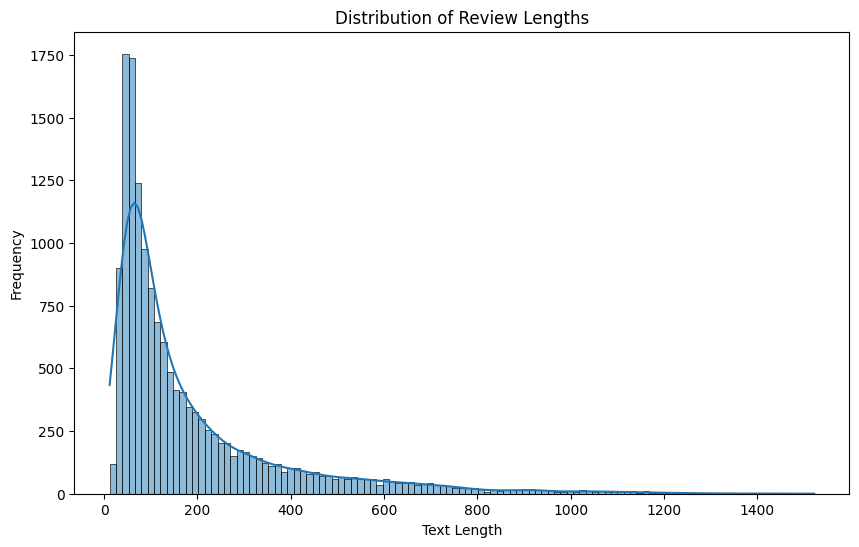

In [17]:
data['text_length'] = data['text_'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [18]:
from wordcloud import WordCloud

spam_words = ' '.join(data[data['label'] == 1]['text_'])
non_spam_words = ' '.join(data[data['label'] == 0]['text_'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(non_spam_words)



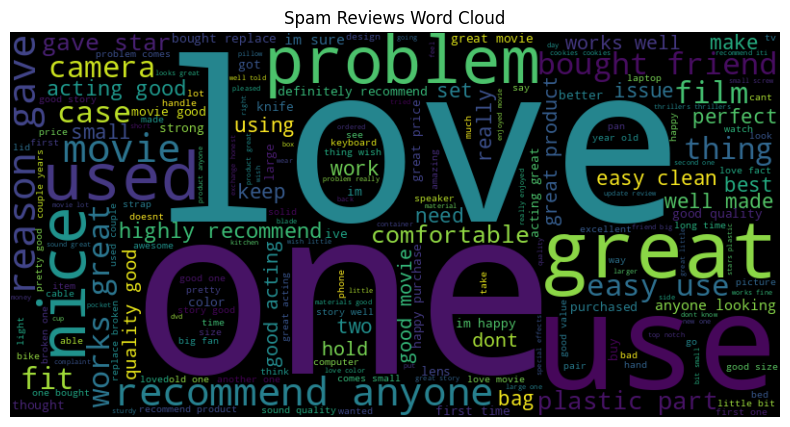

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Reviews Word Cloud')
plt.axis('off')
plt.show()



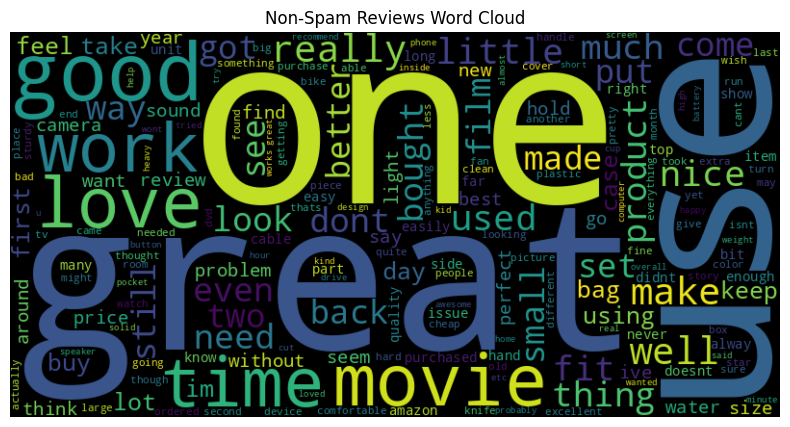

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Non-Spam Reviews Word Cloud')
plt.axis('off')
plt.show()

In [21]:
print("Splitting Data:")
X_train, X_test, y_train, y_test = train_test_split(data['text_'], data['label'], test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}, {y_train.shape}")
print(f"Testing Data: {X_test.shape}, {y_test.shape}")


Splitting Data:
Training Data: (12124,), (12124,)
Testing Data: (3031,), (3031,)


In [22]:
print("Vectorizing Text Data:")
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(f"TF-IDF Vectors: {X_train_tfidf.shape}, {X_test_tfidf.shape}")


Vectorizing Text Data:
TF-IDF Vectors: (12124, 4974), (3031, 4974)


In [23]:
print("Building the Model with Hyperparameter Tuning:")
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)
print("Best Parameters:", grid.best_params_)


Building the Model with Hyperparameter Tuning:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Evaluating the Model:")
y_pred = grid.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Evaluating the Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1544
           1       0.86      0.85      0.86      1487

    accuracy                           0.86      3031
   macro avg       0.86      0.86      0.86      3031
weighted avg       0.86      0.86      0.86      3031

Confusion Matrix:
[[1346  198]
 [ 220 1267]]


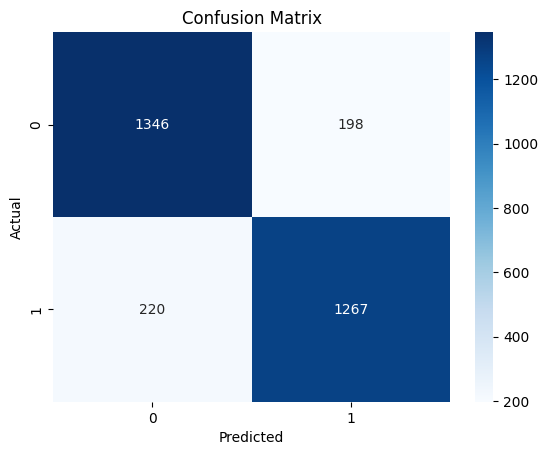

In [25]:

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [26]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")



ROC-AUC Score: 0.861906383823883


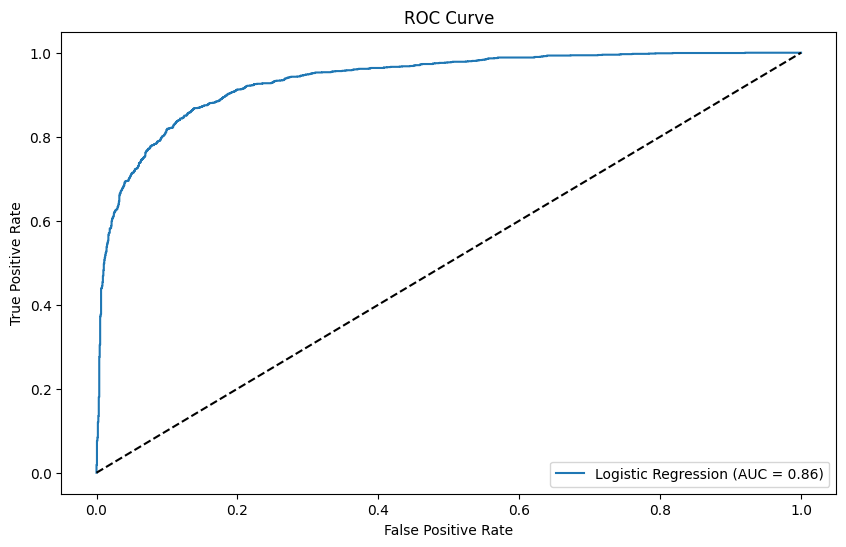

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test_tfidf)[:,1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
!pip freeze > requirements.txt

In [30]:

!pip freeze > requirements.txt